### **Learn about GPT2 architecture**

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

In this section, we introdcue the architecture of GPT2 and try build a sample model to simulate it.

As you learned from lecture, the GPT2 is based on the transformer model, which is raised in paper, *Attention is all you need*. Here is a picture of transformer achitecture for your reference.

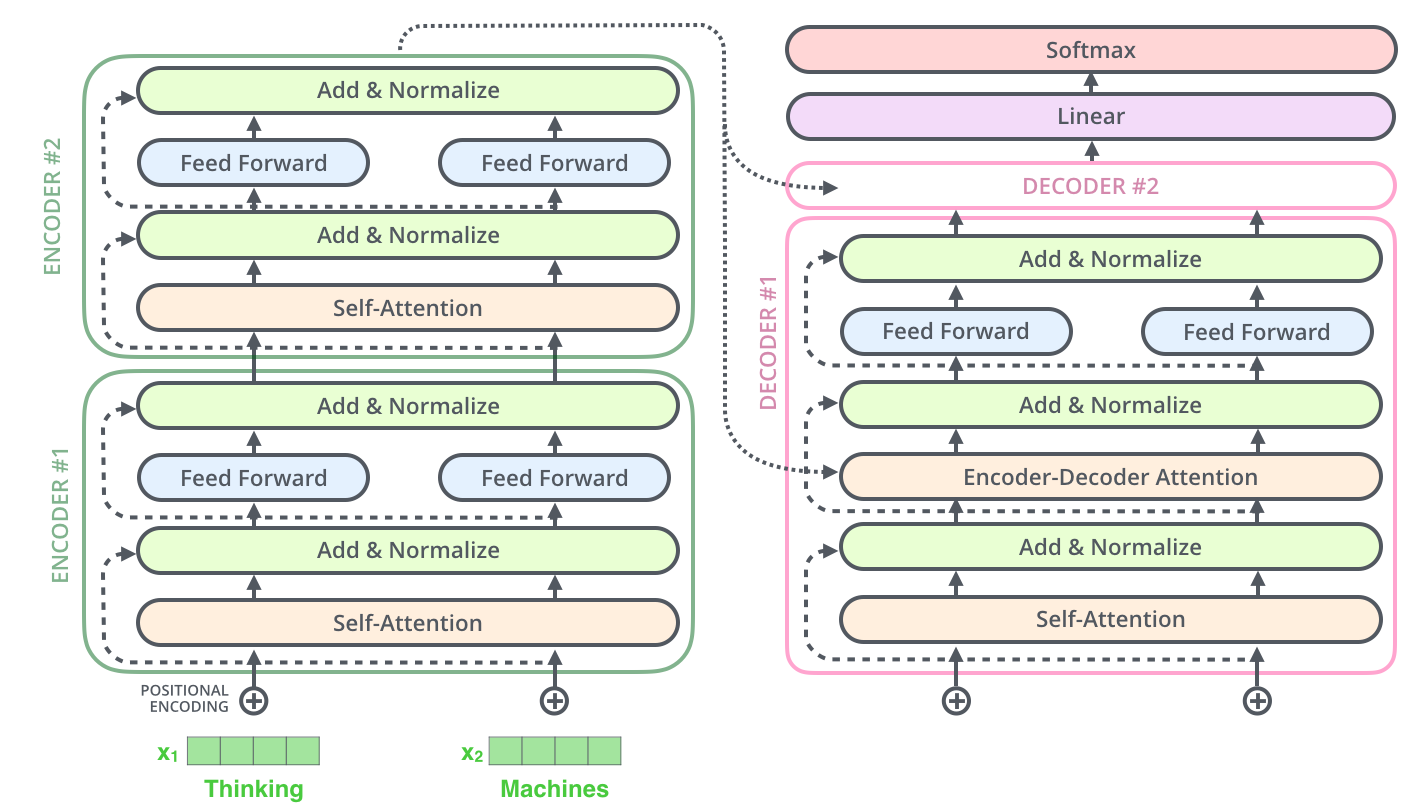

Then people find that only a stack of encoders/decoders are sufficent for taskes, which result in encoder-only transformer, such as BERT and decoder-only transformer, such as GPT2. Here are two pictures showes the architecture of encoder and decoder layer.


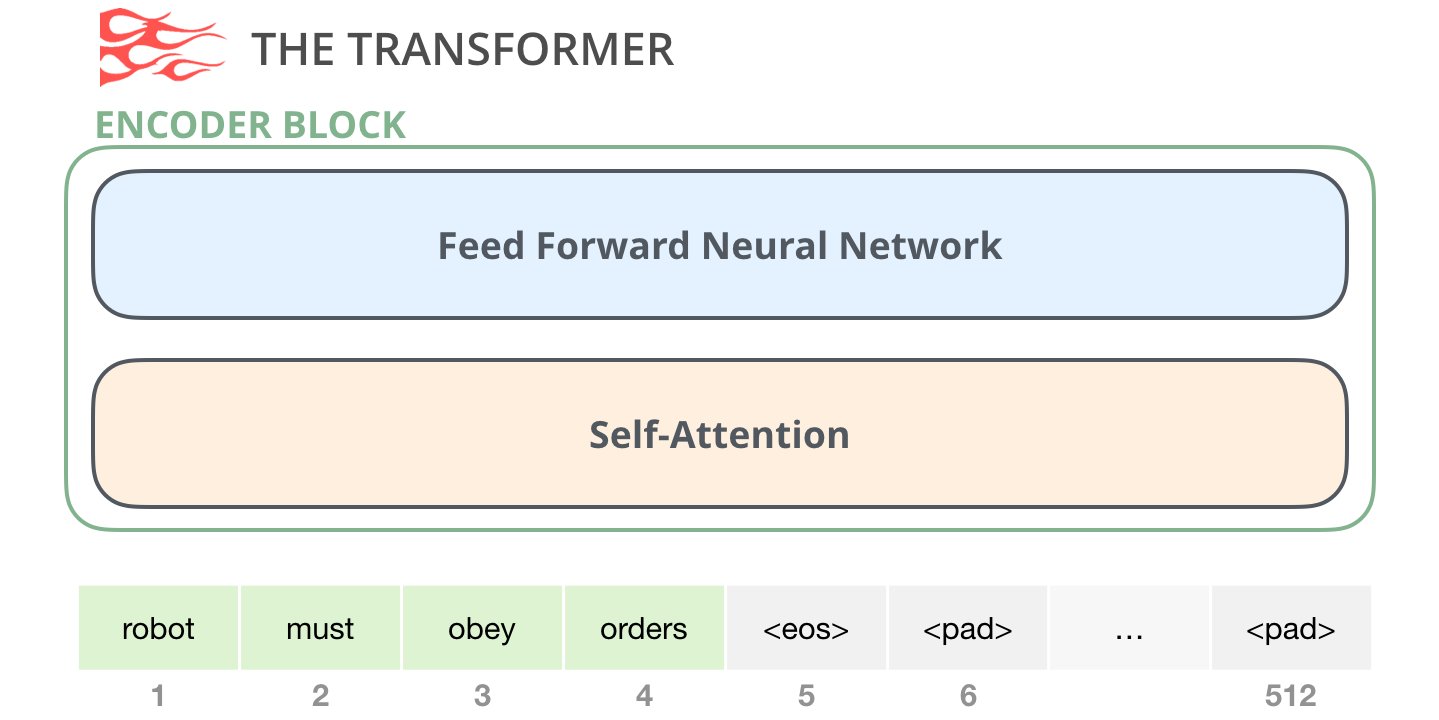

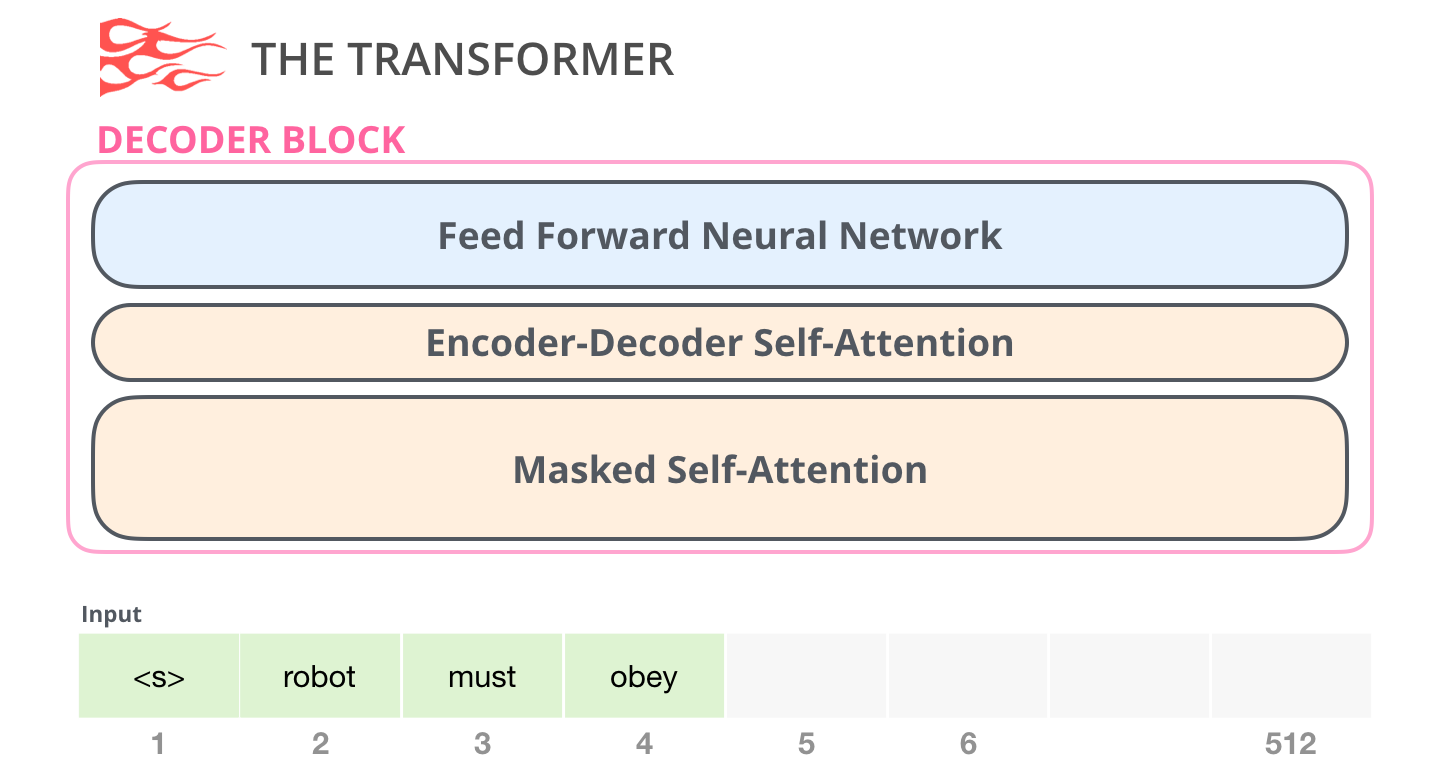

As you can see, the biggest difference between encoder and decoder is decoder has one more layer called **MASKED** self-attention. This layer is, as the name said, a self-attention layer with mask. To be specific, in masked self-attention, the causal relationshipd is added, which means for a certain word, only the words before it can have influence on it. The difference is well demostrated in the following pictures.

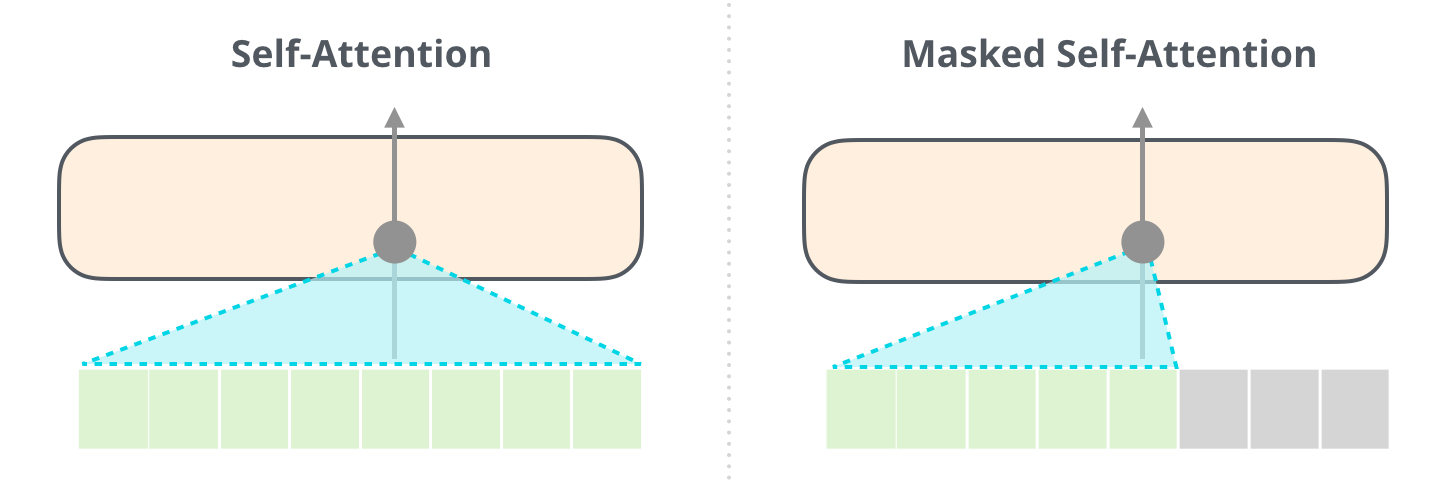

Implementing the transformer or GPT2 is not the main focus of this homework. Here, we provided a detailed Pytorch implementation of a self-attention layer. You task is to apply the causual mask if `causal = True`. 

The scores is computed for you. The attention scores `scores[i, j]` represent the similarity score between the i-th query vector `q[i]` and the j-th key vector `k[j]`.

*Hint: `torch.triu` and `torch.masked_fill` function may be helpful.*

In [ ]:
import torch
import torch.nn.functional as F

def dot_product_attention(q, k, v, causal=False):
    """
    Computes the dot product attention scores and the attention output for a single example.

    Args:
    - q: Tensor of shape (query_length, embedding_size)
    - k: Tensor of shape (key_length, embedding_size)
    - v: Tensor of shape (value_length, embedding_size)
    - causal: Boolean flag indicating whether to apply a causal mask

    Returns:
    - output: Tensor of shape (query_length, embedding_size)
    """
    scores = torch.matmul(q, k.transpose(0, 1)) / (q.shape[-1] ** 0.5)  # shape: (query_length, key_length)
    
    if causal:

      ############################################################################
      # TODO: implement this part
      ############################################################################
        # Create a causal mask for the scores tensor
        mask = torch.triu(torch.ones_like(scores), diagonal=1)
        # print(mask)
        scores.masked_fill_(mask == 1, float("-inf"))
        # print('scores',scores)

      ############################################################################
    
    #print(scores)
    weights = F.softmax(scores, dim=-1)  # shape: (query_length, key_length)
    output = torch.matmul(weights, v)  # shape: (query_length, embedding_size)
    
    return output


In [ ]:
import torch

q = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float)
k = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float)
v = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float)

print(dot_product_attention(q, k, v, True))
print(dot_product_attention(q, k, v, False))




tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
tensor([[6.9999, 7.9999, 8.9999],
        [7.0000, 8.0000, 9.0000],
        [7.0000, 8.0000, 9.0000]])
